- https://apisidra.ibge.gov.br/
- https://sidrapy.readthedocs.io/pt_BR/latest/modules/table.html

In [74]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import sidrapy

from unidecode import unidecode

### Jogo do bixo - analysis

In [39]:
ipca = sidrapy.get_table(table_code='7060', territorial_level='1', ibge_territorial_code='all', period='last 48', classification='315/all', variable='63', header='y')
ipca.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Mês (Código),Mês,Variável (Código),Variável,"Geral, grupo, subgrupo, item e subitem (Código)","Geral, grupo, subgrupo, item e subitem"
1,1,Brasil,2,%,0.21,1,Brasil,202001,janeiro 2020,63,IPCA - Variação mensal,7169,Índice geral
2,1,Brasil,2,%,0.39,1,Brasil,202001,janeiro 2020,63,IPCA - Variação mensal,7170,1.Alimentação e bebidas
3,1,Brasil,2,%,0.20,1,Brasil,202001,janeiro 2020,63,IPCA - Variação mensal,7171,11.Alimentação no domicílio
4,1,Brasil,2,%,0.75,1,Brasil,202001,janeiro 2020,63,IPCA - Variação mensal,7172,"1101.Cereais, leguminosas e oleaginosas"


In [40]:
ipca.columns = ipca.iloc[0]
ipca = ipca.iloc[1:]
ipca = ipca.iloc[:, [4, 7, 12]]
ipca['Valor'] = ipca['Valor'].astype(float)
ipca['Valor'] = ipca['Valor'] / 100
ipca.columns = ['Valor', 'Mes', 'Parada']
ipca['Mes'] = ipca['Mes'].replace({'202001':'Jan', '202002':'Fev', '202003':'Mar',
                                '202004':'Abr', '202005':'Mai', '202006':'Jun'})
ipca.head()

,Valor,Mes,Parada
1,0.0021,Jan,Índice geral
2,0.0039,Jan,1.Alimentação e bebidas
3,0.0020,Jan,11.Alimentação no domicílio
4,0.0075,Jan,"1101.Cereais, leguminosas e oleaginosas"
5,0.0131,Jan,1101002.Arroz


In [41]:
ipca_w = sidrapy.get_table(table_code='7060', territorial_level='1', ibge_territorial_code='all', period='last 48', classification='315/all', variable='66', header='y')
ipca_w.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Mês (Código),Mês,Variável (Código),Variável,"Geral, grupo, subgrupo, item e subitem (Código)","Geral, grupo, subgrupo, item e subitem"
1,1,Brasil,2,%,100.0000,1,Brasil,202001,janeiro 2020,66,IPCA - Peso mensal,7169,Índice geral
2,1,Brasil,2,%,19.3483,1,Brasil,202001,janeiro 2020,66,IPCA - Peso mensal,7170,1.Alimentação e bebidas
3,1,Brasil,2,%,13.4813,1,Brasil,202001,janeiro 2020,66,IPCA - Peso mensal,7171,11.Alimentação no domicílio
4,1,Brasil,2,%,0.6927,1,Brasil,202001,janeiro 2020,66,IPCA - Peso mensal,7172,"1101.Cereais, leguminosas e oleaginosas"


In [42]:
ipca_w.columns = ipca_w.iloc[0]
ipca_w = ipca_w.iloc[1:]
ipca_w = ipca_w.iloc[:, [4, 7, 12]]
ipca_w['Valor'] = ipca_w['Valor'].astype(float)
ipca_w['Valor'] = ipca_w['Valor'] / 100
ipca_w.columns = ['Peso', 'Mes', 'Parada']
ipca_w['Mes'] = ipca_w['Mes'].replace({'202001':'Jan', '202002':'Fev', '202003':'Mar',
                                '202004':'Abr', '202005':'Mai', '202006':'Jun'})
ipca_w.head()

,Peso,Mes,Parada
1,1.000000,Jan,Índice geral
2,0.193483,Jan,1.Alimentação e bebidas
3,0.134813,Jan,11.Alimentação no domicílio
4,0.006927,Jan,"1101.Cereais, leguminosas e oleaginosas"
5,0.004753,Jan,1101002.Arroz


In [43]:
df = pd.merge(ipca, ipca_w, on=['Mes', 'Parada'])
df.head()

,Valor,Mes,Parada,Peso
0,0.0021,Jan,Índice geral,1.000000
1,0.0039,Jan,1.Alimentação e bebidas,0.193483
2,0.0020,Jan,11.Alimentação no domicílio,0.134813
3,0.0075,Jan,"1101.Cereais, leguminosas e oleaginosas",0.006927
4,0.0131,Jan,1101002.Arroz,0.004753


In [44]:
df['Higher Number'] = df['Parada'].str.extract(r'(\d+)\.')

df['Higher Number'].fillna(0, inplace=True)
df['Higher Number'] = df['Higher Number'].astype(int)

df =df[df['Higher Number'] > 10000]
df.head()

,Valor,Mes,Parada,Peso,Higher Number
4,0.0131,Jan,1101002.Arroz,0.004753,1101002
5,0.0450,Jan,1101051.Feijão - mulatinho,0.000116,1101051
6,-0.0268,Jan,1101052.Feijão - preto,0.000486,1101052
7,0.0539,Jan,1101053.Feijão - macáçar (fradinho),0.000121,1101053
8,-0.0070,Jan,1101073.Feijão - carioca (rajado),0.001350,1101073


In [54]:
df['Valor_w'] = df['Valor'] * df['Peso']
df = df[df['Mes'] == 'Jun']
df.head()

,Valor,Mes,Parada,Peso,Higher Number,Valor_w
2289,0.0274,Jun,1101002.Arroz,0.005244,1101002,0.000144
2290,0.0710,Jun,1101051.Feijão - mulatinho,0.000145,1101051,0.000010
2291,0.0675,Jun,1101052.Feijão - preto,0.000583,1101052,0.000039
2292,0.0288,Jun,1101053.Feijão - macáçar (fradinho),0.000149,1101053,0.000004
2293,0.0496,Jun,1101073.Feijão - carioca (rajado),0.001630,1101073,0.000081


In [55]:
df['Valor_w'].sum()

0.0025998069

In [57]:
df_sorted = df.sort_values(by='Valor_w', ascending=False)

In [60]:
df_sorted.reset_index(drop=True, inplace=True)
df_sorted[df_sorted['Parada'] == '7201063.Jogos de azar']

,Valor,Mes,Parada,Peso,Higher Number,Valor_w
232,0.0,Jun,7201063.Jogos de azar,0.005344,7201063,0.0


In [58]:
fig = go.Figure(go.Bar(
    x=list(df_sorted['Parada'].values),
    y=list(df_sorted['Valor_w'].values),
    orientation='h'
))

# Update layout to adjust the appearance
fig.update_layout(
    title='Horizontal Bar Graph',
    xaxis_title='Itens',
    yaxis_title='Valor',
)

# Show the plot
fig.show()

In [49]:
import plotly.graph_objects as go

# Sample data
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [30, 45, 60, 20]

# Create the horizontal bar graph
fig = go.Figure(go.Bar(
    x=values,
    y=categories,
    orientation='h'
))

# Update layout to adjust the appearance
fig.update_layout(
    title='Horizontal Bar Graph',
    xaxis_title='Values',
    yaxis_title='Categories',
)

# Show the plot
fig.show()


### Censo

In [45]:
pop = sidrapy.get_table(table_code='4709', territorial_level='6', ibge_territorial_code='all', period='all', variable='10605', header='y')
pop.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Município (Código),Município,Ano (Código),Ano,Variável (Código),Variável
1,6,Município,2,%,-1.05,1100015,Alta Floresta D'Oeste - RO,2022,2022,10605,Taxa de crescimento geométrico
2,6,Município,2,%,0.58,1100023,Ariquemes - RO,2022,2022,10605,Taxa de crescimento geométrico
3,6,Município,2,%,-1.35,1100031,Cabixi - RO,2022,2022,10605,Taxa de crescimento geométrico
4,6,Município,2,%,0.84,1100049,Cacoal - RO,2022,2022,10605,Taxa de crescimento geométrico


In [3]:
pop.columns = pop.iloc[0]
pop = pop.iloc[1:]
pop = pop.iloc[:, [4, 6, 8]]
pop['Valor'] = pop['Valor'].astype(float)
pop['Valor'] = pop['Valor'] / 100
pop.columns = ['Valor', 'Municipio', 'Ano']
pop['Estado'] = pop['Municipio'].str.split('-').str[-1].str.strip()
pop['Municipio'] = pop['Municipio'].str.split('-').str[0].str.strip()

In [4]:
pop.head()

,Valor,Municipio,Ano,Estado
1,-0.0105,Alta Floresta D'Oeste,2022,RO
2,0.0058,Ariquemes,2022,RO
3,-0.0135,Cabixi,2022,RO
4,0.0084,Cacoal,2022,RO
5,-0.0058,Cerejeiras,2022,RO


In [5]:
import geopandas as gpd
import geobr

In [ ]:
municipalities = geobr.read_municipality()

In [21]:
municipalities['name_muni'] = municipalities['name_muni'].str.upper()
pop['Municipio'] = pop['Municipio'].str.upper()

In [23]:
df = municipalities.merge(pop, left_on='name_muni', right_on='Municipio', how='left')
df.head()

,code_muni,name_muni,code_state,abbrev_state,geometry,Valor,Municipio,Ano,Estado
0,1100015.0,ALTA FLORESTA D'OESTE,11.0,RO,"MULTIPOLYGON (((-62.24620 -11.90149, -62.24151...",-0.0105,ALTA FLORESTA D'OESTE,2022,RO
1,1100023.0,ARIQUEMES,11.0,RO,"MULTIPOLYGON (((-63.13712 -9.78413, -63.09013 ...",0.0058,ARIQUEMES,2022,RO
2,1100031.0,CABIXI,11.0,RO,"MULTIPOLYGON (((-60.52408 -13.32137, -60.37161...",-0.0135,CABIXI,2022,RO
3,1100049.0,CACOAL,11.0,RO,"MULTIPOLYGON (((-61.42679 -11.11376, -61.42900...",0.0084,CACOAL,2022,RO
4,1100056.0,CEREJEIRAS,11.0,RO,"MULTIPOLYGON (((-61.41347 -13.23417, -61.42603...",-0.0058,CEREJEIRAS,2022,RO


In [32]:
df.dropna(subset=['Valor'], inplace=True)

c:\Users\Yamac\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\Yamac\AppData\Local\Programs\Python\Python310\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
c:\Users\Yamac\AppData\Local\Programs\Python\Python310\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


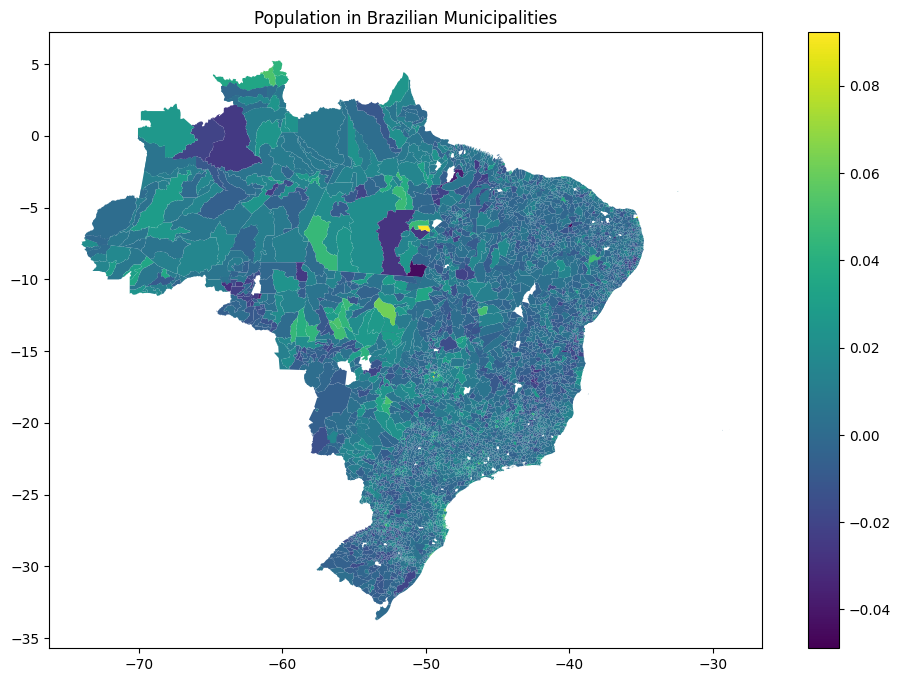

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))
df.plot(column='Valor', cmap='viridis', ax=ax, legend=True)
plt.title('Population in Brazilian Municipalities')
plt.show()


In [65]:
pop_estado = sidrapy.get_table(table_code='4709', territorial_level='3', ibge_territorial_code='all', period='all', variable='10605', header='y')

In [66]:
pop_estado.columns = pop_estado.iloc[0]
pop_estado = pop_estado.iloc[1:]
pop_estado = pop_estado.iloc[:, [4, 6, 8]]
pop_estado['Valor'] = pop_estado['Valor'].astype(float)
pop_estado.columns = ['Valor', 'Municipio', 'Ano']
pop_estado['Estado'] = pop_estado['Municipio'].str.split('-').str[-1].str.strip()
pop_estado['Municipio'] = pop_estado['Municipio'].str.split('-').str[0].str.strip()

In [68]:
states = geobr.read_state()
pop_estado['Estado'] = pop_estado['Estado'].str.upper()
states['name_state'] = states['name_state'].str.upper()

In [83]:
pop_estado['Estado'] = pop_estado['Estado'].apply(lambda x: unidecode(x))
states['name_state'] = states['name_state'].apply(lambda x: unidecode(x))

In [84]:
dof = states.merge(pop_estado, left_on='name_state', right_on='Estado', how='left')

In [85]:
dof

,code_state,abbrev_state,name_state,code_region,name_region,geometry,Valor,Municipio,Ano,Estado
0,11.0,RO,RONDONIA,1.0,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...",0.10,Rondônia,2022,RONDONIA
1,12.0,AC,ACRE,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...",1.03,Acre,2022,ACRE
2,13.0,AM,AMAZONAS,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...",1.03,Amazonas,2022,AMAZONAS
3,14.0,RR,RORAIMA,1.0,Norte,"MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...",2.92,Roraima,2022,RORAIMA
4,15.0,PA,PARA,1.0,Norte,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...",0.57,Pará,2022,PARA
5,16.0,AP,AMAPA,1.0,Norte,"MULTIPOLYGON (((-51.17970 4.00008, -51.17739 3...",0.76,Amapá,2022,AMAPA
6,17.0,TO,TOCANTINS,1.0,Norte,"MULTIPOLYGON (((-48.35878 -5.17008, -48.33846 ...",0.74,Tocantins,2022,TOCANTINS
7,21.0,MA,MARANHAO,2.0,Nordeste,"MULTIPOLYGON (((-45.84073 -1.04548, -45.84099 ...",0.25,Maranhão,2022,MARANHAO
8,22.0,PI,PIAUI,2.0,Nordeste,"MULTIPOLYGON (((-41.74605 -2.80350, -41.73488 ...",0.39,Piauí,2022,PIAUI
9,23.0,CE,CEARA,2.0,Nordeste,"MULTIPOLYGON (((-41.16703 -4.46736, -41.17757 ...",0.33,Ceará,2022,CEARA


c:\Users\Yamac\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\Yamac\AppData\Local\Programs\Python\Python310\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
c:\Users\Yamac\AppData\Local\Programs\Python\Python310\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


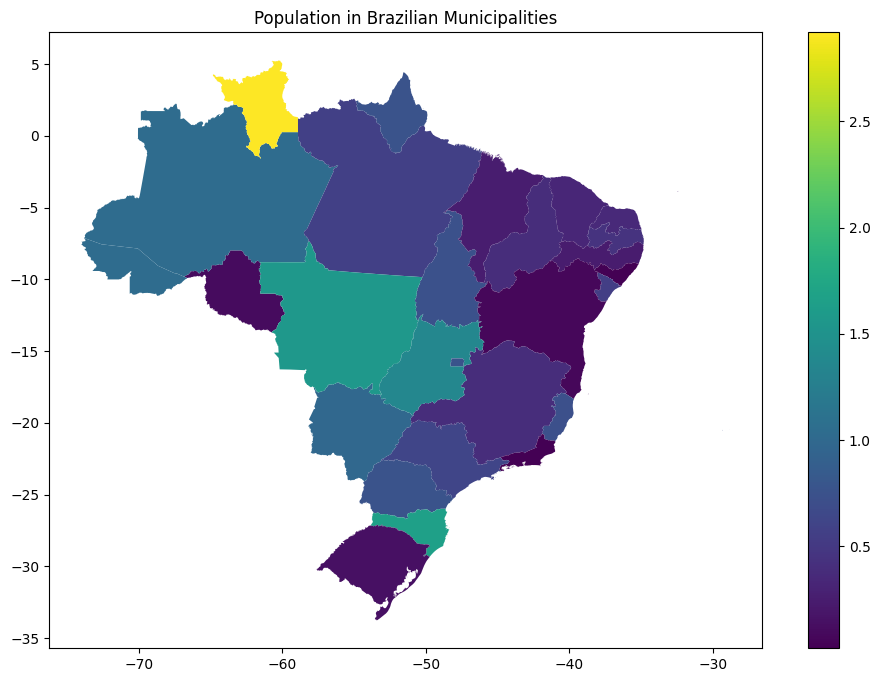

In [86]:
fig, ax = plt.subplots(figsize=(12, 8))
dof.plot(column='Valor', cmap='viridis', ax=ax, legend=True)
plt.title('Population in Brazilian Municipalities')
plt.show()